# Q1. Train a Perceptron


Perceptron is a fundamental building block for neural networks. Let us try to
train a single perceptron. Consider the data given in the following table. As one
can see, it has two attributes x1,x2 and a class label (either 0 or 1).

## Implement the perceptron training rule and get the appropriate parameters for a single perceptron.

In [14]:
# Importing packages.
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [15]:
class Perceptron(object):

    def __init__(self, no_of_inputs, inputs, labels,threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.inputs = inputs
        self.labels = labels
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation

    def train(self):

        for _ in range(self.threshold):
            for inputs, label in zip(self.inputs, self.labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
        print("Bias %.2f"%(self.weights[0]))
        print("Weights: {}".format( self.weights[1:] ))
  
    def plot_data(self):
        # fig config
        plt.figure(figsize=(10,6))
        plt.grid(True)
        plt.xlabel('x1')
        plt.ylabel('x2')
        

        #plot input samples(2D data points) and i have two classes. 
        #one is +1 and second one is 0, so it red color for +1 and green color for 0
        for input,target in zip(self.inputs, self.labels):
            plt.plot(input[0],input[1],'r*' if (target == 1.0) else 'g*' )

        # Here i am calculating slope and intercept with given three weights
        for i in np.linspace(np.amin(self.inputs[:,:1]),np.amax(self.inputs[:,:1])):
            slope = -(self.weights[0]/self.weights[2])/(self.weights[0]/self.weights[1])  
            intercept = -self.weights[0]/self.weights[2]

            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + intercept
            plt.plot(i, y,'k.')
            

In [16]:
#Creating dataset
X = np.array([[2,3],[4,5],[11,11],[4,11],[12,5],[5,2],[6,1],[6,3],[2,10],[4,7],[13,8],[1,6],[6,9],[10,12],[8,3],[2,8]])
Y = np.array([0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1])

In [17]:
perceptron = Perceptron(2,X, Y)
perceptron.train()

Bias -0.76
Weights: [-0.36  0.43]


## Plot the data points and the obtained decision boundary

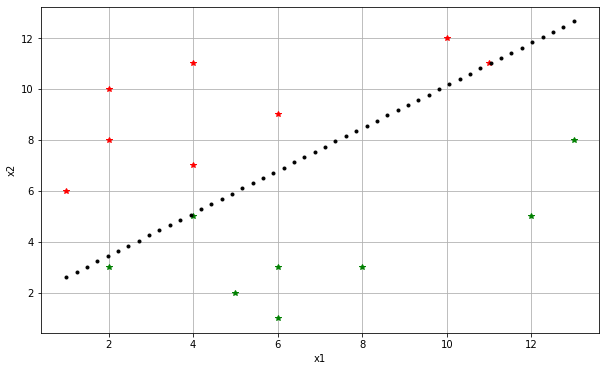

In [18]:
perceptron.plot_data()

## Also draw the schematic diagram of the trained perceptron with learned weights.

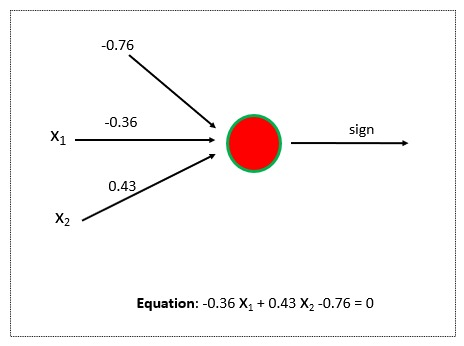

In [19]:
Image(filename='schematic.jpg') 

# Q2. Train a Neural Network

Let us design a neural network to classify flowers from Iris dataset.

## Implement a single hidden layer MLP. Final output layer will have 3 neurons, one for each result. Arch: [Input, hidden, output]

In [20]:
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm


class MultiLayerPerceptron(): 
    def __init__(self, params=None):     
 
        #Neurons configuration
        self.inputLayer = 4                        # Input Layer 
        self.hiddenLayer = 5                       # Hidden Layer
        self.outputLayer = 3                       # Outpuy Layer
         
        self.learningRate = 0.005                  # Learning rate
        self.max_epochs = 500                      # Epochs
        self.BiasHiddenValue = -1                   # Bias HiddenLayer
        self.BiasOutputValue = -1                  # Bias OutputLayer
        self.activation = self.ativacao['sigmoid'] # Activation function
        self.deriv = self.derivada['sigmoid']
         
        #Starting Bias and Weights
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.outputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.outputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.outputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
  
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
     
        plt.show()
       
    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.outputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
         
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output) 
                
            count_epoch += 1
        
        self.print_params()
 
        self.show_err_graphic(error_array,epoch_array)
     
        return self

    def print_params(self):
        print('*'*80)
        print('Hidden Layer Parameters ')
        print('*'*80)
        print('Weights ')
        for w in self.WEIGHT_hidden:
            print(w)
 
        print('Bias ')
        print(self.BIAS_hidden)
        print()
        print('*'*80)
        print('Output Layer Parameters ')
        print('*'*80)
        print('Weights ')
        for w in self.WEIGHT_output:
            print(w)
        
        print('Bias ')
        print(self.BIAS_output)
 

In [21]:
import pandas as pd
from sklearn import preprocessing 

url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris=pd.read_csv(url,header=None)
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
iris['species']= label_encoder.fit_transform(iris['species']) 
iris['species'].unique() 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

Epoch  1 - Total Error:  0.052627605768736915
Epoch  50 - Total Error:  0.044400208062536674
Epoch  100 - Total Error:  0.034890641691492835
Epoch  150 - Total Error:  0.02976909925404221
Epoch  200 - Total Error:  0.026012743296501092
Epoch  250 - Total Error:  0.022725918597491523
Epoch  300 - Total Error:  0.019829945305669866
Epoch  350 - Total Error:  0.017386068115533598
Epoch  400 - Total Error:  0.015408404597054635
Epoch  450 - Total Error:  0.013847472208973094
Epoch  500 - Total Error:  0.012625424829450156
********************************************************************************
Hidden Layer Parameters 
********************************************************************************
Weights 
[-1.8810013594790689, 0.5457508244025665, -0.14060389006420188, -1.2081586355212763, -0.28571271303527074]
[-1.0082543992721482, 0.7480967783416862, -0.8847457861015856, -1.4810886794602802, -1.939395997891688]
[3.18263021303208, 0.6831662274575578, -1.1057319853487397, 2.3055602

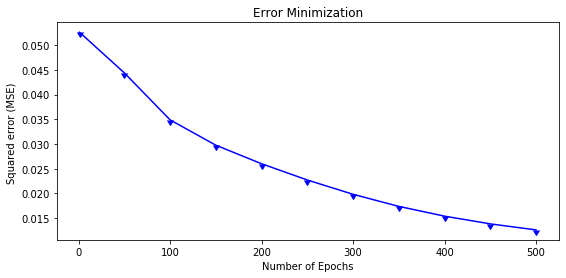

In [23]:
mlp = MultiLayerPerceptron( )
mlp.fit(X,y)

## (i) Use keras to design the NN model and train on the iris data.

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
y_ =  iris.iloc[:, 4].values # Convert data to a single column
y_ = y_.reshape(-1, 1)

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20)

# Build the model

model = Sequential()

#Input and hidden Layer 1
model.add(Dense(9, input_shape=(4,), activation='relu', name='hidden1'))
 
#hidden layer 2
model.add(Dense(3, activation='relu', name='hidden2'))

#output layer
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=1, batch_size=5, epochs=200)



In [ ]:
# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

## (ii) Draw the schematic diagram of the NN 2 along with all the weights and specify suitable activation function. How many trainable parameters are there?

In [ ]:
#TODO:Draw schematic diagram based on following values
for layer in model.layers:
    weights = layer.get_weights() 
    print(weights)

There are 87 total trainable parameters 